#Student Name: Nelima Otieno
#Student Pace: Fulltime Hybrid
#Instructor Name: Maryann Mwikali

#AVIATION DATA ANALYSIS
##OBJECTIVE
 To identify low risk aircrafts suitable for initial investment in both commercial and private aviation operations.Using historical aircraft accident and incident data as a proxy for risk, this analysis aims to evaluate aircraft types based on safety outcomes and operational reliability.
The findings of this analysis will be translated into actionable, data-driven recommendations to support the head of Fleet planning and Management in making informed aircraft purchasing decisions. The ultimate goal is to minimize safety, operational, and financial risk while establishing a reliable and scalable aviation fleet.





# Section 1

Importing relevant libraries and loading the data.
Making sure to look at its patterns and understand it

In [195]:
#Importing the relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
#Loading the DataFrame
df = pd.read_csv("Aviation_Data.csv", on_bad_lines='skip', engine="python")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [197]:
#Identifying columns in the DataFrame
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [198]:
#Getting more information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14148 entries, 0 to 14147
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                14148 non-null  object 
 1   Investigation.Type      14148 non-null  object 
 2   Accident.Number         14148 non-null  object 
 3   Event.Date              14148 non-null  object 
 4   Location                14143 non-null  object 
 5   Country                 14087 non-null  object 
 6   Latitude                5 non-null      float64
 7   Longitude               5 non-null      float64
 8   Airport.Code            7146 non-null   object 
 9   Airport.Name            8493 non-null   object 
 10  Injury.Severity         14148 non-null  object 
 11  Aircraft.damage         13875 non-null  object 
 12  Aircraft.Category       3592 non-null   object 
 13  Registration.Number     14148 non-null  object 
 14  Make                    14142 non-null

In [199]:
#Checking for missing values in each column
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,5
Country,61
Latitude,14143
Longitude,14143
Airport.Code,7002
Airport.Name,5655


In [200]:
#Inspecting columns with missing values
df[df.isna().any(axis=1)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,20001213X33027,Accident,DCA86AA021,1986-03-13,"ALPENA, MI",United States,NaN,NaN,APN,PHELPS-COLLINS,...,Unknown,Simmons Airlines,3.0,5.0,1.0,0.0,IMC,Approach,Probable Cause,07-03-1988
14144,20001213X32975,Incident,ATL86IA093,1986-03-13,"CHARLESTON, SC",United States,NaN,NaN,CHS,CHARLESTON AFB/INTL.,...,Unknown,NaN,0.0,0.0,0.0,79.0,VMC,Landing,Probable Cause,NaN
14145,20001213X32967,Accident,ATL86FA092,1986-03-13,"TOLEDO, OH",United States,NaN,NaN,TOL,TOLEDO,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,NaN
14146,20001213X33030,Accident,DEN86FA099,1986-03-13,"SILVER CITY, NM",United States,NaN,NaN,94E,WHISKEY CREEK,...,Positioning,NaN,0.0,2.0,0.0,0.0,VMC,Maneuvering,Probable Cause,NaN


#Section 2
#Data Cleaning and Preprocessing
#Here we are going to clean and preprocess the data to make it suitable for analysis.This includes handling missing values, converting data types, and renaming columns for better readability.
This dataset contains a lot of columns that are not relevant to our analysis. We will select only the columns that are necessary for our analysis

In [201]:
New_df = df[["Investigation.Type","Accident.Number", "Aircraft.Category","Make","Model", "Number.of.Engines","Engine.Type", "Purpose.of.flight", "Air.carrier", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Event.Date"]].copy()
New_df

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,NaN,Stinson,108-3,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,NaN,Cessna,172M,1.0,Reciprocating,Personal,NaN,3.0,NaN,NaN,NaN,1974-08-30
3,Accident,LAX96LA321,NaN,Rockwell,112,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,NaN,Cessna,501,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,Accident,DCA86AA021,NaN,Embraer,EMB-110P1,2.0,Turbo Prop,Unknown,Simmons Airlines,3.0,5.0,1.0,0.0,1986-03-13
14144,Incident,ATL86IA093,NaN,Mcdonnell Douglas,DC-9-31,2.0,Turbo Fan,Unknown,NaN,0.0,0.0,0.0,79.0,1986-03-13
14145,Accident,ATL86FA092,NaN,Piper,PA-23,2.0,Reciprocating,Personal,NaN,1.0,0.0,0.0,0.0,1986-03-13
14146,Accident,DEN86FA099,NaN,Cessna,401,2.0,Reciprocating,Positioning,NaN,0.0,2.0,0.0,0.0,1986-03-13


In [202]:
#Checking for duplicated values
New_df.duplicated().sum()

np.int64(0)

In [203]:
#Dropping duplicated values
New_df=New_df.drop_duplicates()

In [204]:
#Checking if we dropped the duplicated values
New_df.duplicated().sum()

np.int64(0)

In [205]:
#Checking for the sum of missing values on the new DataFrame
New_df.isna().sum()

,0
Investigation.Type,0
Accident.Number,0
Aircraft.Category,10556
Make,6
Model,15
Number.of.Engines,146
Engine.Type,2
Purpose.of.flight,17
Air.carrier,13465
Total.Fatal.Injuries,63


In [206]:
#Inspecting columns with missing values
New_df[New_df.isna().any(axis=1)]

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,NaN,Stinson,108-3,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,NaN,Cessna,172M,1.0,Reciprocating,Personal,NaN,3.0,NaN,NaN,NaN,1974-08-30
3,Accident,LAX96LA321,NaN,Rockwell,112,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,NaN,Cessna,501,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,Accident,DCA86AA021,NaN,Embraer,EMB-110P1,2.0,Turbo Prop,Unknown,Simmons Airlines,3.0,5.0,1.0,0.0,1986-03-13
14144,Incident,ATL86IA093,NaN,Mcdonnell Douglas,DC-9-31,2.0,Turbo Fan,Unknown,NaN,0.0,0.0,0.0,79.0,1986-03-13
14145,Accident,ATL86FA092,NaN,Piper,PA-23,2.0,Reciprocating,Personal,NaN,1.0,0.0,0.0,0.0,1986-03-13
14146,Accident,DEN86FA099,NaN,Cessna,401,2.0,Reciprocating,Positioning,NaN,0.0,2.0,0.0,0.0,1986-03-13


In [207]:
#Creating Injuries column that will help evaluate risk and filling the missing values
Injury_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
New_df[Injury_columns] = New_df[Injury_columns].fillna(0)
New_df

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,NaN,Stinson,108-3,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,NaN,Cessna,172M,1.0,Reciprocating,Personal,NaN,3.0,0.0,0.0,0.0,1974-08-30
3,Accident,LAX96LA321,NaN,Rockwell,112,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,NaN,Cessna,501,NaN,NaN,Personal,NaN,1.0,2.0,0.0,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,Accident,DCA86AA021,NaN,Embraer,EMB-110P1,2.0,Turbo Prop,Unknown,Simmons Airlines,3.0,5.0,1.0,0.0,1986-03-13
14144,Incident,ATL86IA093,NaN,Mcdonnell Douglas,DC-9-31,2.0,Turbo Fan,Unknown,NaN,0.0,0.0,0.0,79.0,1986-03-13
14145,Accident,ATL86FA092,NaN,Piper,PA-23,2.0,Reciprocating,Personal,NaN,1.0,0.0,0.0,0.0,1986-03-13
14146,Accident,DEN86FA099,NaN,Cessna,401,2.0,Reciprocating,Positioning,NaN,0.0,2.0,0.0,0.0,1986-03-13


In [208]:
#Filling the null values with unkown in the selected columns
categorical_unkown= ["Aircraft.Category", "Engine.Type", "Purpose.of.flight", "Make", "Model","Air.carrier"]
New_df[categorical_unkown] = New_df[categorical_unkown].fillna("Unknown")
New_df

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,Unknown,Cessna,172M,1.0,Reciprocating,Personal,Unknown,3.0,0.0,0.0,0.0,1974-08-30
3,Accident,LAX96LA321,Unknown,Rockwell,112,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,Unknown,Cessna,501,NaN,Unknown,Personal,Unknown,1.0,2.0,0.0,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,Accident,DCA86AA021,Unknown,Embraer,EMB-110P1,2.0,Turbo Prop,Unknown,Simmons Airlines,3.0,5.0,1.0,0.0,1986-03-13
14144,Incident,ATL86IA093,Unknown,Mcdonnell Douglas,DC-9-31,2.0,Turbo Fan,Unknown,Unknown,0.0,0.0,0.0,79.0,1986-03-13
14145,Accident,ATL86FA092,Unknown,Piper,PA-23,2.0,Reciprocating,Personal,Unknown,1.0,0.0,0.0,0.0,1986-03-13
14146,Accident,DEN86FA099,Unknown,Cessna,401,2.0,Reciprocating,Positioning,Unknown,0.0,2.0,0.0,0.0,1986-03-13


In [209]:
#Here we are imputing number of engines with the mode
Engines_mode=New_df["Number.of.Engines"].mode()[0]
New_df["Number.of.Engines"]=New_df["Number.of.Engines"].fillna(Engines_mode)
New_df


,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,Unknown,Cessna,172M,1.0,Reciprocating,Personal,Unknown,3.0,0.0,0.0,0.0,1974-08-30
3,Accident,LAX96LA321,Unknown,Rockwell,112,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,Unknown,Cessna,501,1.0,Unknown,Personal,Unknown,1.0,2.0,0.0,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,Accident,DCA86AA021,Unknown,Embraer,EMB-110P1,2.0,Turbo Prop,Unknown,Simmons Airlines,3.0,5.0,1.0,0.0,1986-03-13
14144,Incident,ATL86IA093,Unknown,Mcdonnell Douglas,DC-9-31,2.0,Turbo Fan,Unknown,Unknown,0.0,0.0,0.0,79.0,1986-03-13
14145,Accident,ATL86FA092,Unknown,Piper,PA-23,2.0,Reciprocating,Personal,Unknown,1.0,0.0,0.0,0.0,1986-03-13
14146,Accident,DEN86FA099,Unknown,Cessna,401,2.0,Reciprocating,Positioning,Unknown,0.0,2.0,0.0,0.0,1986-03-13


In [210]:
#Confirming if we still have missing values
New_df.isna().sum()

,0
Investigation.Type,0
Accident.Number,0
Aircraft.Category,0
Make,0
Model,0
Number.of.Engines,0
Engine.Type,0
Purpose.of.flight,0
Air.carrier,0
Total.Fatal.Injuries,0


In [211]:
# Converting injury and engine count columns to integer type
int_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]
New_df[int_columns] = New_df[int_columns].astype(int)
New_df.head()


,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1,Reciprocating,Personal,Unknown,2,0,0,0,1948-10-24
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1,Reciprocating,Personal,Unknown,4,0,0,0,1962-07-19
2,Accident,NYC07LA005,Unknown,Cessna,172M,1,Reciprocating,Personal,Unknown,3,0,0,0,1974-08-30
3,Accident,LAX96LA321,Unknown,Rockwell,112,1,Reciprocating,Personal,Unknown,2,0,0,0,1977-06-19
4,Accident,CHI79FA064,Unknown,Cessna,501,1,Unknown,Personal,Unknown,1,2,0,0,1979-08-02


In [212]:
#Converting "Event.Date" to datetime objects
New_df['Event.Date'] = pd.to_datetime(New_df['Event.Date'])
New_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      5 non-null      object        
 1   Accident.Number         5 non-null      object        
 2   Aircraft.Category       5 non-null      object        
 3   Make                    5 non-null      object        
 4   Model                   5 non-null      object        
 5   Number.of.Engines       5 non-null      int64         
 6   Engine.Type             5 non-null      object        
 7   Purpose.of.flight       5 non-null      object        
 8   Air.carrier             5 non-null      object        
 9   Total.Fatal.Injuries    5 non-null      int64         
 10  Total.Serious.Injuries  5 non-null      int64         
 11  Total.Minor.Injuries    5 non-null      int64         
 12  Total.Uninjured         5 non-null      int64         

Section 3

In this section we start conducting our analysis with the select matrix.
1. We  use the injury type to see which injury type is the most common
2. We  use the engine type on the total injuries to accertain which engine type is lowrisk
3. Number of engines and total injuries
4. We  also evaluate risk based on make and model, the model and make with the lowest will be the least risky.
5. We purpose of flight to identify which sector to invest more in, private or public.

In [213]:
#Creating a column for total injuries to get a picture of all injuries in an event
New_df["Total.Injuries"]=New_df["Total.Fatal.Injuries"]+New_df["Total.Serious.Injuries"]+New_df["Total.Minor.Injuries"]
New_df.head()

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date,Total.Injuries
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1,Reciprocating,Personal,Unknown,2,0,0,0,1948-10-24,2
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1,Reciprocating,Personal,Unknown,4,0,0,0,1962-07-19,4
2,Accident,NYC07LA005,Unknown,Cessna,172M,1,Reciprocating,Personal,Unknown,3,0,0,0,1974-08-30,3
3,Accident,LAX96LA321,Unknown,Rockwell,112,1,Reciprocating,Personal,Unknown,2,0,0,0,1977-06-19,2
4,Accident,CHI79FA064,Unknown,Cessna,501,1,Unknown,Personal,Unknown,1,2,0,0,1979-08-02,3


In [214]:
#Getting the sum of injuries per type
injury_totals = {"Fatal Injuries": New_df["Total.Fatal.Injuries"].sum(), "Serious Injuries": New_df["Total.Serious.Injuries"].sum(), "Minor Injuries": New_df["Total.Minor.Injuries"].sum()}
injury_totals

{'Fatal Injuries': np.int64(5911),
 'Serious Injuries': np.int64(2820),
 'Minor Injuries': np.int64(4355)}

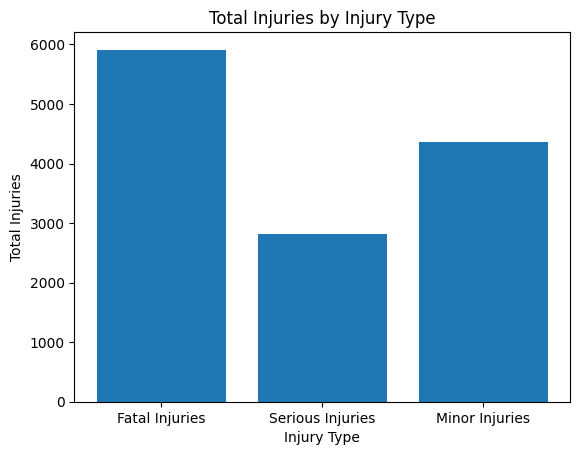

In [215]:
#Lets visualize that by plotting a bar chart that compares fatal, serious and minor injuries
plt.figure()
plt.bar(injury_totals.keys(), injury_totals.values())
plt.xlabel("Injury Type")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Injury Type")
plt.show()

Findings from the visual

The visual clearly shows that fatal injuries are the most prevalent followed by minor then serious injuries.

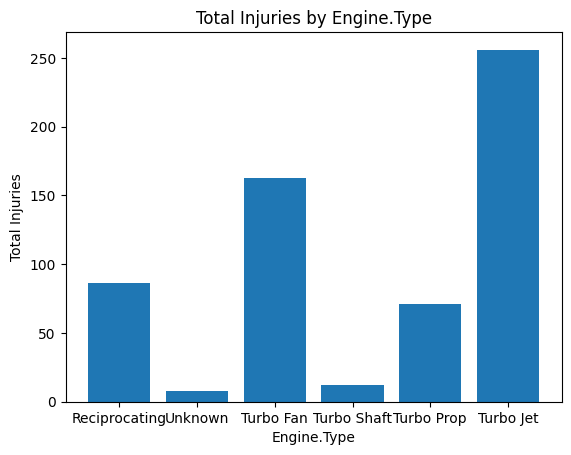

In [216]:
#Lets plot the Engine type against  injury totals
plt.figure()
plt.bar(New_df["Engine.Type"], New_df["Total.Injuries"])
plt.xlabel("Engine.Type")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Engine.Type")
plt.show()

Here it is clear that the Turbo jet causes the highest total injuries.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

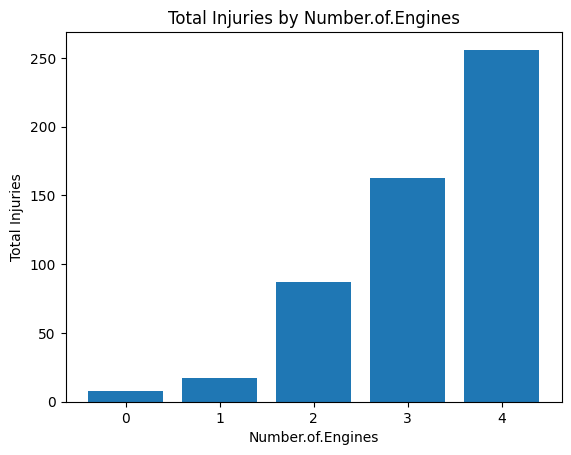

In [217]:
#Plotting number of engines total injuries
plt.figure()
plt.bar(New_df["Number.of.Engines"], New_df["Total.Injuries"])
plt.xlabel("Number.of.Engines")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Number.of.Engines")
plt

. The total number of injuries increase with the number of Engines in an aircraft.

In [238]:
#Evaluating risk by Make and Model
Risk_by_make_model = (New_df.groupby(["Make", "Model", "Purpose.of.flight"])["Total.Injuries"].mean().reset_index().sort_values("Total.Injuries"))
Risk_by_make_model.head(10)

,Make,Model,Purpose.of.flight,Total.Injuries
3608,Piper,PA-18-150,Ferry,0.0
3585,Piper,PA-12-115,Personal,0.0
3594,Piper,PA-18,Aerial Observation,0.0
2891,Homebuilt,MUSTANG II,Personal,0.0
2894,Homebuilt,QUICKIE 2,Personal,0.0
2896,Homebuilt,SPAD XIII,Personal,0.0
2164,Champion,7GCBC,Personal,0.0
2165,Champion,7GCBC,Unknown,0.0
2167,Champion,7HC,Unknown,0.0
2171,Champion,AERONCA 7GC,Instructional,0.0


Aircraft risk was calculated as the average number of injuries per accident grouped by make and model.
The make and the model at the top is the least risky.

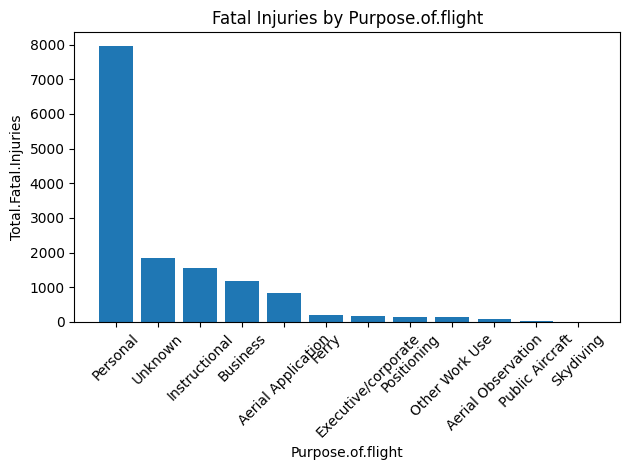

In [241]:
#Loking at the relationship between purpose of flight and Total fatal injuries
purpose_counts=New_df["Purpose.of.flight"].value_counts()
plt.figure()
plt.bar(purpose_counts.index, purpose_counts.values)
plt.xlabel("Purpose.of.flight")
plt.ylabel("Total.Fatal.Injuries")
plt.title("Fatal Injuries by Purpose.of.flight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is clear that personal aircrafts caused the highest number of fatal accidents. Therefore presents a high risk.

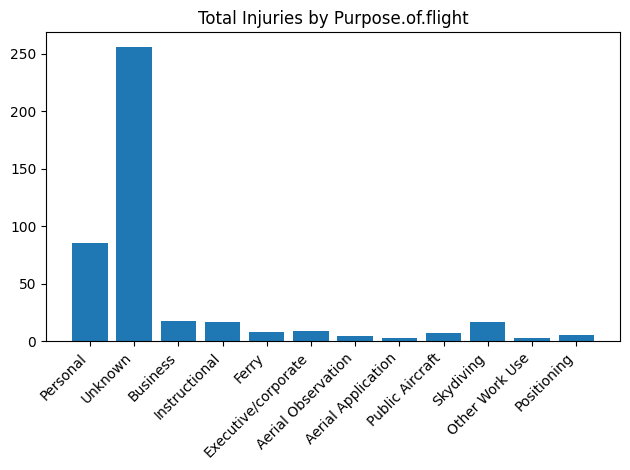

In [219]:
#Now let us see how the purpose of flight relate to the total injuries
plt.figure()
plt.bar(New_df["Purpose.of.flight"], New_df["Total.Injuries"])
plt.xticks(rotation=45, ha="right")
plt.title("Total Injuries by Purpose.of.flight")
plt.tight_layout()
plt.show()

It is clear that personal aircrafts caused more accidents compared to public aircrafts

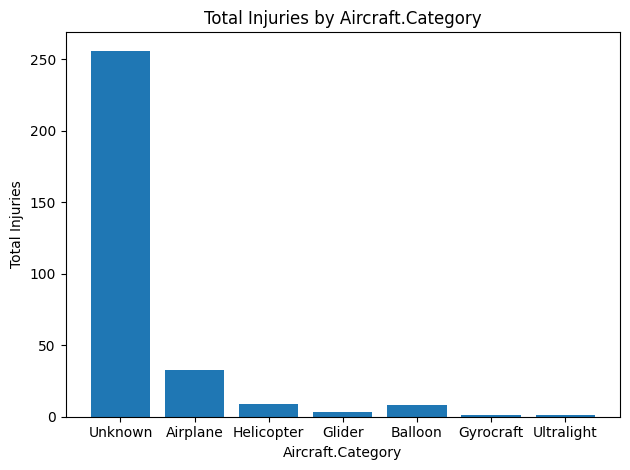

In [220]:
#By aircraft cartegory
plt.figure()
plt.bar(New_df["Aircraft.Category"], New_df["Total.Injuries"])
plt.xlabel("Aircraft.Category")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Aircraft.Category")
plt.tight_layout()
plt.show()